# Assignment 1

### Part 1 - Basic python

For the simple python code to execute the diffusion iteration, I have defined an array $u0$ as the initial condition and $u1$ as an empty array to store next iteration. $u0$ is a grid of zeros with size $N$, and in this example values in a 4x4 section in the centre have been set to one. For loops are used to calculate the value of each point after one iteration using the reccurance relation given in the question. Results of this iteration calculation fill $un1$ then $un$ is updated to set initial condition for the next iteration. This matrix $un$ is returned and gives the new matrix after one step of the diffusion iteration. 

In [1]:
import numpy as np

def diffusion_iteration(un, un1):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return np.around(un, 3)
    

N = 10
u0 = np.zeros([N, N], dtype = 'float64')
u0[int(N/2)-2:int(N/2)+2, int(N/2)-2:int(N/2)+2] = 1
u1 = np.empty([N, N], dtype = 'float64')

for interations in range(0,3):
    print(diffusion_iteration(u0, u1))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.25 0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.25 0.5  0.75 0.75 0.5  0.25 0.   0.  ]
 [0.   0.   0.25 0.75 1.   1.   0.75 0.25 0.   0.  ]
 [0.   0.   0.25 0.75 1.   1.   0.75 0.25 0.   0.  ]
 [0.   0.   0.25 0.5  0.75 0.75 0.5  0.25 0.   0.  ]
 [0.   0.   0.   0.25 0.25 0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.062 0.062 0.062 0.062 0.    0.    0.   ]
 [0.    0.    0.125 0.188 0.312 0.312 0.188 0.125 0.    0.   ]
 [0.    0.062 0.188 0.5   0.625 0.625 0.5   0.188 0.062 0.   ]
 [0.    0.062 0.312 0.625 0.875 0.875 0.625 0.312 0.062 0.   ]
 [0.    0.062 0.312 0.625 0.875 0.875 0.625 0.312 0.062 0.   ]
 [0.    0.062 0.188 0.5   0.625 0.625 0.5   0.188 0.062 0.   ]
 [0.    0.    0.125 0.188 0.

To find the compute time of one iteration a Timer class is made. This uses the $time()$ function to call the seconds since the epoch (January 1, 1970, 00:00:00 (UTC)) as a floating point number at the start and end of an iteration and then find the difference to give the time for one iteration. 

In [2]:
import time

class Timer:    
    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.interval = self.end - self.start

To find the relationship between the size of the array N and compute time I have run the diffusion iteration function for one iteration over a range of N and plotted against compute time. The complexity of the runtime should be of order $N^2$ as we are using a 2d array. This is shown in the plots in the very similar trends in the two plots below.

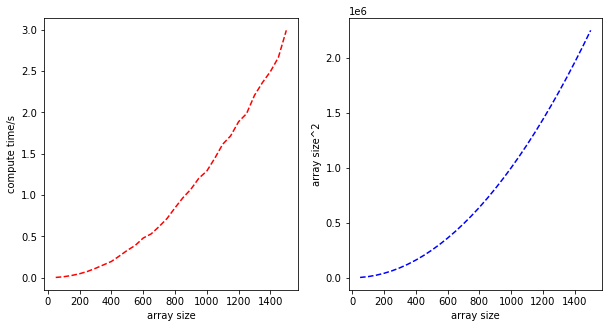

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def diffusion_iteration(un, un1, N):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un
    

x = []
y = []

for array_size in range(50,1550,50):
    
    u0 = np.zeros([array_size, array_size], dtype = 'float64')
    u0[int(array_size/2)-2:int(array_size/2)+2, int(array_size/2)-2:int(array_size/2)+2] = 1
    u1 = np.empty([array_size, array_size], dtype = 'float64')
    
    with Timer() as t:
        diffusion_iteration(u0, u1, array_size)
    x.append(array_size)
    y.append(t.interval)

fig = plt.figure(figsize=(10.0, 5.0))

axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

axes1.set_ylabel("compute time/s")
axes1.set_xlabel("array size")
axes1.plot(x, y, 'r--')

axes2.set_ylabel("array size^2")
axes2.set_xlabel("array size")
axes2.plot(x,np.square(x), 'b--')


plt.show()

### part 2 - Numba acceleration and parallelisation

In [4]:
import numba 
import numpy as np

@numba.njit
def diffusion_iteration(un, un1, N):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un        

array_size = 5000
u0 = np.zeros([array_size, array_size], dtype='float64')
u1 = np.empty([array_size, array_size], dtype='float64')
u0[1, 1:array_size-1] = 1

with Timer() as t:
        diffusion_iteration(u0, u1, array_size)
print("array size: {}".format(array_size),"| time for process: {0}".format(t.interval))

array size: 5000 | time for process: 0.3512613773345947


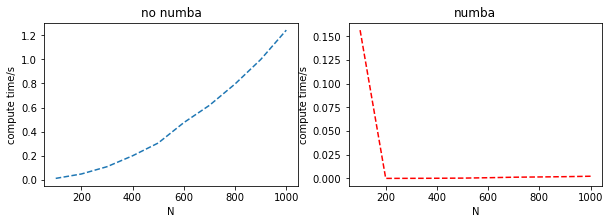

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numba 

def diffusion_iteration(un, un1, N):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un

@numba.njit
def diffusion_iteration_jit(un, un1, N):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    un[:] = un1
    return un

x = []
y = []
x1 =[]
yjit = []

for array_size in range(100,1100,100):
    
    u0 = np.zeros([array_size, array_size], dtype = 'float64')
    u0[int(array_size/2)-2:int(array_size/2)+2, int(array_size/2)-2:int(array_size/2)+2] = 1
    u1 = np.empty([array_size, array_size], dtype = 'float64')
    
    with Timer() as t:
        diffusion_iteration(u0, u1, array_size)
    x.append(array_size)
    y.append(t.interval)
    
for array_size in range(100,1100,100):
    
    u0 = np.zeros([array_size, array_size], dtype = 'float64')
    u0[int(array_size/2)-2:int(array_size/2)+2, int(array_size/2)-2:int(array_size/2)+2] = 1
    u1 = np.empty([array_size, array_size], dtype = 'float64')
    
    with Timer() as t:
        diffusion_iteration_jit(u0, u1, array_size)
    x1.append(array_size)
    yjit.append(t.interval)

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

axes1.plot(x, y, '--')
axes1.set_title('no numba')
axes1.set_xlabel('N')
axes1.set_ylabel('compute time/s')

axes2.plot(x, yjit, 'r--')
axes2.set_xlabel('N')
axes2.set_title('numba')
axes2.set_ylabel('compute time/s')


plt.show()